In [136]:
import time

import pandas as pd
import tensorflow as tf

from window import WindowGenerator
import utils

In [137]:
def train_case(case_df, model, in_width, out_steps, max_epochs):
    """ Train model for given case df. """
    
    outlets = [ col for col in case_df.columns.values if col.startswith('outlet') ]
    column_indices = { name: i for i, name in enumerate(case_df.columns) }

    train_df, test_df, val_df = utils.train_test_val_split(case_df, test_size=0, val_size=0.2)
    # train_df, test_df, val_df = normalize_datasets(train_df, test_df, val_df)

    label_columns = outlets

    multi_window = WindowGenerator(
        train_df=train_df,
        val_df=val_df,
        test_df=test_df,
        input_width=in_width,
        label_width=out_steps,
        shift=out_steps,
        label_columns=label_columns
    )

    history = model.fit(
        multi_window.train,
        epochs=max_epochs,
        validation_data=multi_window.val,
        verbose=0
        # callbacks=[early_stopping]
    )

    return multi_window, history

# Dataset

In [138]:
case_1 = pd.read_csv("../datasets/case_1.csv", index_col='Time')
case_2 = pd.read_csv("../datasets/case_2.csv", index_col='Time')
case_3 = pd.read_csv("../datasets/case_3.csv", index_col='Time')
case_4 = pd.read_csv("../datasets/case_4.csv", index_col='Time')
case_5 = pd.read_csv("../datasets/case_5.csv", index_col='Time')

In [139]:
outlets = [ col for col in case_1.columns.values if col.startswith('outlet') ]
label_columns = outlets
num_features = case_1.shape[1]

In [140]:
column_indices = { name: i for i, name in enumerate(case_1.columns) }

# Model Creation

In [141]:
IN_WIDTH = 18
OUT_STEPS = 18
MAX_EPOCHS = 20
features_size = len(label_columns)

In [142]:
print(f"Using {IN_WIDTH*5}s of data to predict {OUT_STEPS*5}s.")
print(f"Using {IN_WIDTH*5/60}min of data to predict {OUT_STEPS*5/60}min.")

Using 90s of data to predict 90s.
Using 1.5min of data to predict 1.5min.


In [143]:
CONV_WIDTH = 3 # default 3
multi_conv_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, CONV_WIDTH, features]
    tf.keras.layers.Lambda(lambda x: x[:, -CONV_WIDTH:, :]),
    # Shape => [batch, 1, conv_units]
    tf.keras.layers.Conv1D(256, activation='relu', kernel_size=(CONV_WIDTH)),
    # Shape => [batch, 1,  out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*features_size,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, features_size])
])

multi_conv_model.compile(loss=tf.losses.MeanSquaredError(),
                         optimizer=tf.optimizers.Adam(),
                         metrics=[tf.metrics.RootMeanSquaredError()])

# history = compile_and_fit(multi_conv_model, multi_window)

# IPython.display.clear_output()

# multi_val_performance['Conv'] = multi_conv_model.evaluate(multi_window.val)
# multi_performance['Conv'] = multi_conv_model.evaluate(multi_window.test, verbose=0)
# multi_window.plot(multi_conv_model)

In [144]:
exec_times = {}

In [ ]:
results = {}

## Case 2

In [145]:
start_t = time.time()

window, history = train_case(
    case_df=case_2,
    model=multi_conv_model,
    in_width=IN_WIDTH,
    out_steps=OUT_STEPS,
    max_epochs=MAX_EPOCHS
)

exec_times['case_2'] = time.time() - start_t

2022-10-02 19:39:24.981326: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-10-02 19:39:25.412842: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [146]:
exec_times

{'case_2': 9.146006107330322}

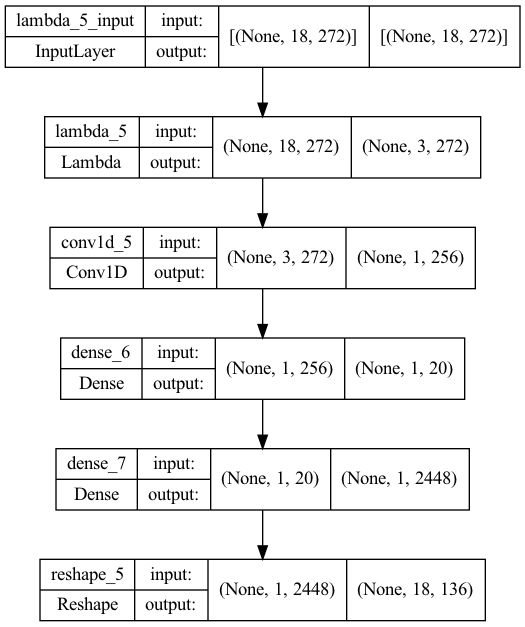

In [147]:
tf.keras.utils.plot_model(multi_conv_model, "../plots/models/multi_conv_model.png", show_shapes=True)

label_col_index 135
label_col_index 135
label_col_index 135


2022-10-02 19:39:34.188597: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


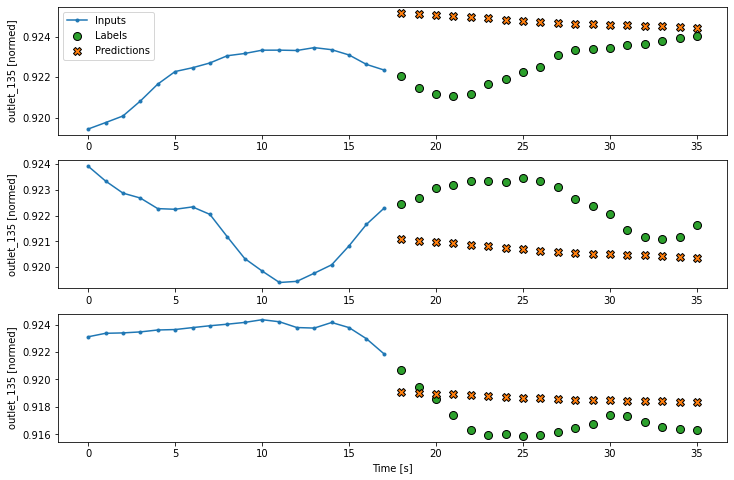

In [148]:
window.plot(multi_conv_model, plot_col="outlet_135")

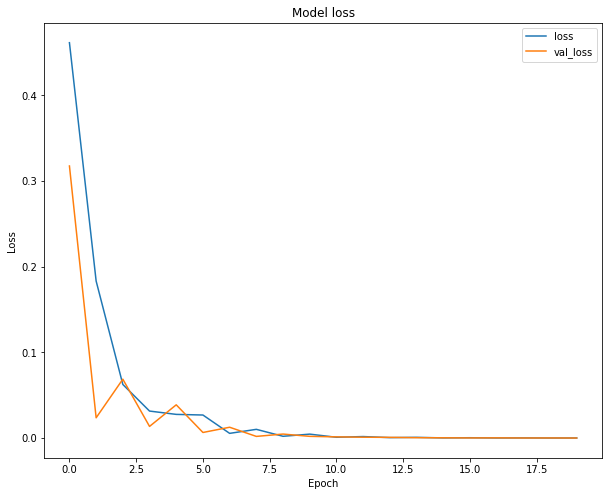

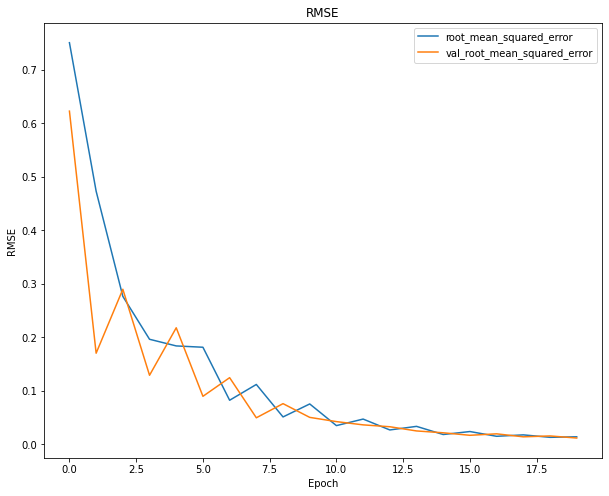

In [149]:
utils.plot_losses(history=history)

In [ ]:
results['case_2'] = {
    'loss': history.history['loss'][-1],
    'rmse': history.history['root_mean_squared_error'][-1],
    'val_loss': history.history['val_loss'][-1],
    'val_rmse': history.history['val_root_mean_squared_error'][-1],
}

## Case 3

In [150]:
start_t = time.time()

window, history = train_case(
    case_df=case_3,
    model=multi_conv_model,
    in_width=IN_WIDTH,
    out_steps=OUT_STEPS,
    max_epochs=MAX_EPOCHS
)

exec_times['case_3'] = time.time() - start_t

label_col_index 135
label_col_index 135
label_col_index 135


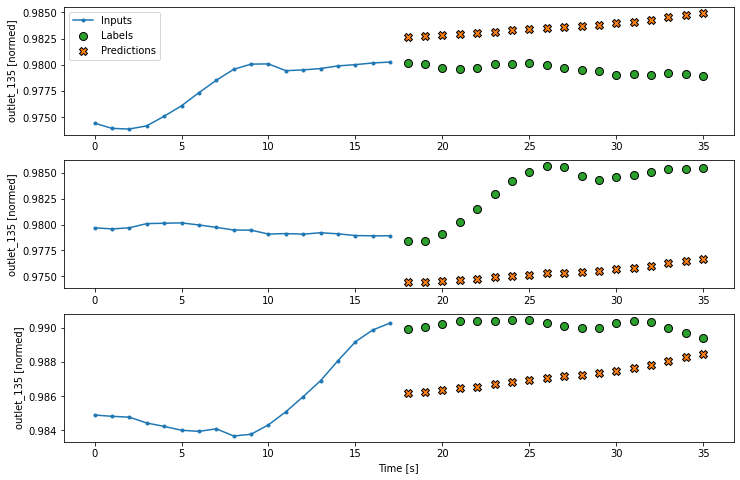

In [151]:
window.plot(multi_conv_model, plot_col="outlet_135")

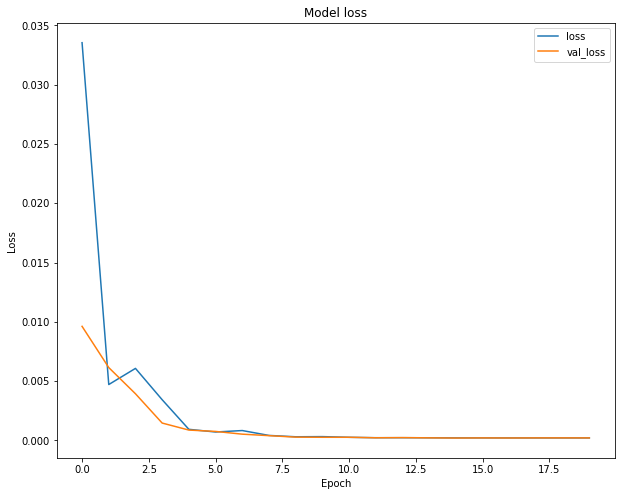

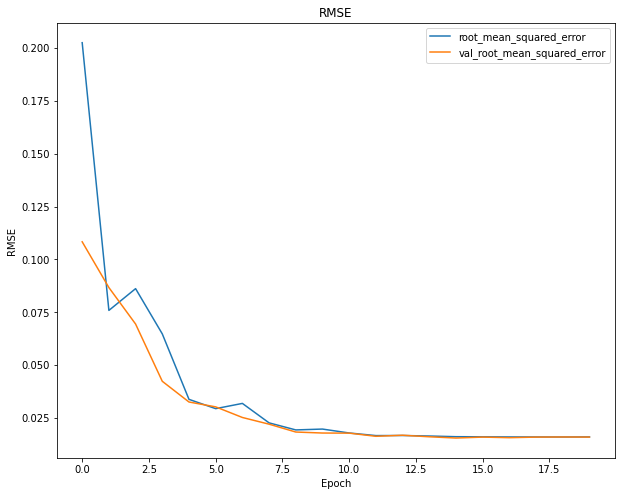

In [152]:
utils.plot_losses(history=history)

In [ ]:
results['case_3'] = {
    'loss': history.history['loss'][-1],
    'rmse': history.history['root_mean_squared_error'][-1],
    'val_loss': history.history['val_loss'][-1],
    'val_rmse': history.history['val_root_mean_squared_error'][-1],
}

## Case 4

In [153]:
start_t = time.time()

window, history = train_case(
    case_df=case_4,
    model=multi_conv_model,
    in_width=IN_WIDTH,
    out_steps=OUT_STEPS,
    max_epochs=MAX_EPOCHS
)

exec_times['case_4'] = time.time() - start_t

label_col_index 135
label_col_index 135
label_col_index 135


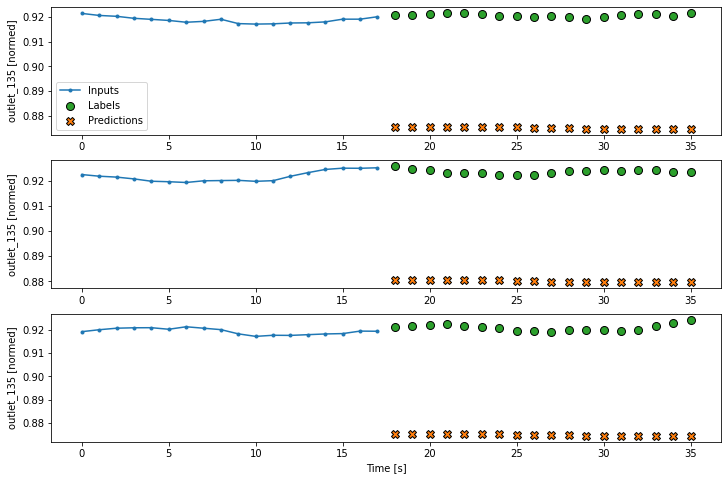

In [154]:
window.plot(multi_conv_model, plot_col="outlet_135")

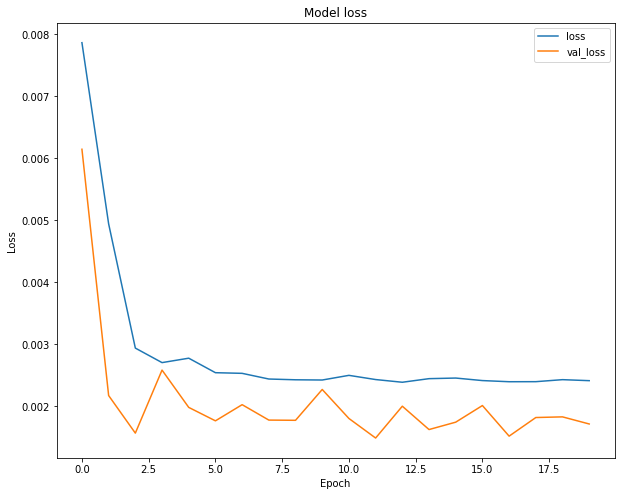

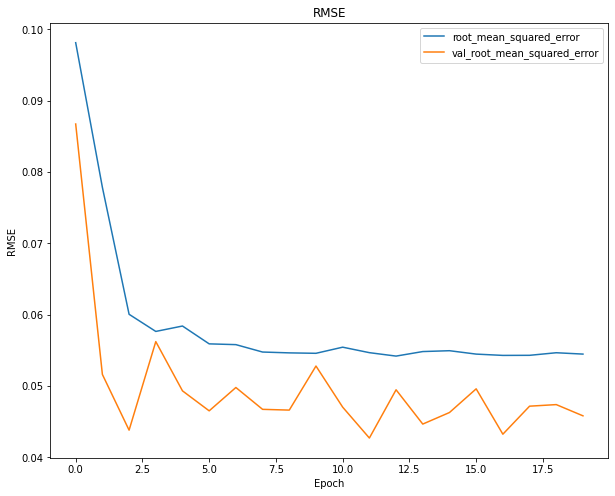

In [155]:
utils.plot_losses(history=history)

In [ ]:
results['case_4'] = {
    'loss': history.history['loss'][-1],
    'rmse': history.history['root_mean_squared_error'][-1],
    'val_loss': history.history['val_loss'][-1],
    'val_rmse': history.history['val_root_mean_squared_error'][-1],
}

## Case 5

In [156]:
start_t = time.time()

window, history = train_case(
    case_df=case_5,
    model=multi_conv_model,
    in_width=IN_WIDTH,
    out_steps=OUT_STEPS,
    max_epochs=MAX_EPOCHS
)

exec_times['case_5'] = time.time() - start_t

label_col_index 135
label_col_index 135
label_col_index 135


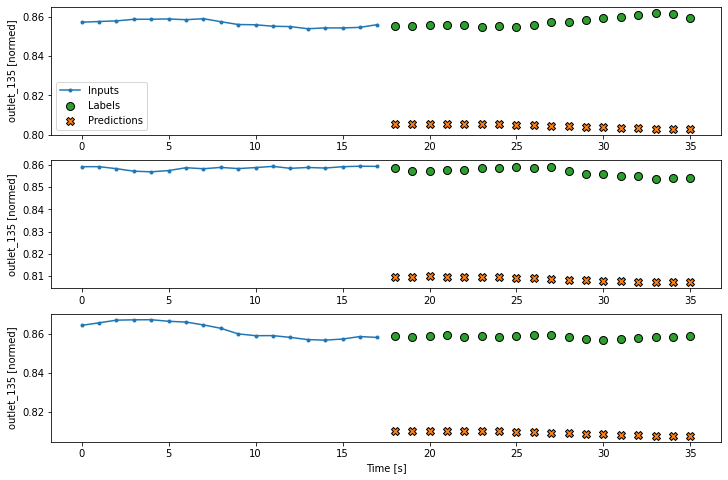

In [157]:
window.plot(multi_conv_model, plot_col="outlet_135")

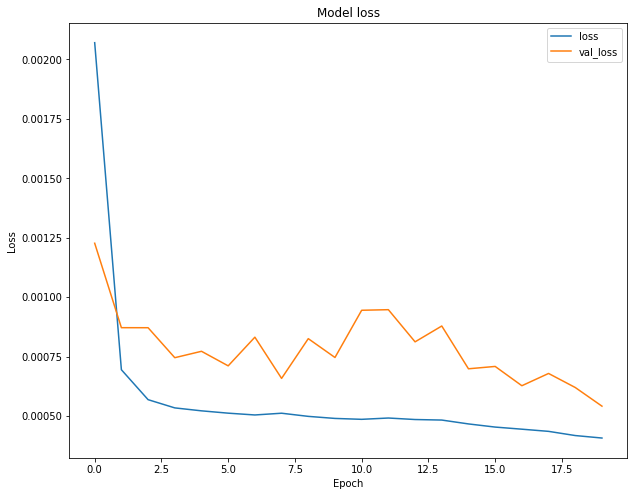

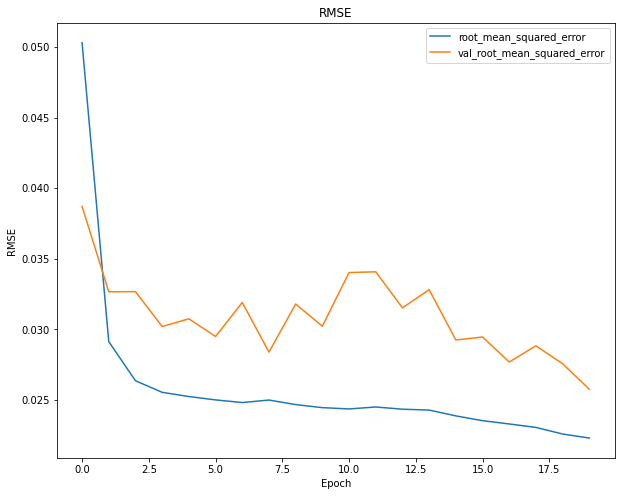

In [158]:
utils.plot_losses(history=history)

In [ ]:
results['case_5'] = {
    'loss': history.history['loss'][-1],
    'rmse': history.history['root_mean_squared_error'][-1],
    'val_loss': history.history['val_loss'][-1],
    'val_rmse': history.history['val_root_mean_squared_error'][-1],
}

## Case 1 (Testing)

In [159]:
outlets = [ col for col in case_1.columns.values if col.startswith('outlet') ]
column_indices = { name: i for i, name in enumerate(case_1.columns) }

In [160]:
window = WindowGenerator(
    train_df=case_1,
    input_width=IN_WIDTH,
    label_width=OUT_STEPS,
    shift=OUT_STEPS,
    label_columns=outlets
)

test_res = multi_conv_model.evaluate(window.train) # testing

5/5 [==============================] - 0s 10ms/step - loss: 0.0216 - root_mean_squared_error: 0.1626


[0.021632928401231766, 0.16260425746440887]

In [ ]:
results['test'] = {
    'loss': test_res[0],
    'rmse': test_res[1]
}

In [ ]:
pd.DataFrame(results).transpose()

In [161]:
exec_times = pd.DataFrame().from_dict(exec_times, orient='index', columns=['Time'])
exec_times

,Time
case_2,9.146006
case_3,9.213151
case_4,10.128268
case_5,11.836762


In [162]:
print("Total: ", exec_times['Time'].sum())

Total:  40.32418704032898
